# Reading an .arff (Attribute-Relation File Format) file using pandas 

In [1]:
# # !pip install liac-arff

# import pandas as pd
# import arff

# def read_arff(file_path):
#     # Load the ARFF file
#     with open(file_path, 'r') as f:
#         arff_data = arff.load(f)
    
#     # Extract attribute names and data
#     attributes = [attr[0] for attr in arff_data['attributes']]
#     data = arff_data['data']
    
#     # Create a pandas DataFrame
#     df = pd.DataFrame(data, columns=attributes)
    
#     # Convert data types
#     for attr, dtype in arff_data['attributes']:
#         if dtype == 'NUMERIC':
#             df[attr] = pd.to_numeric(df[attr], errors='coerce')
#         elif dtype == 'STRING':
#             df[attr] = df[attr].astype(str)
#         # Add more type conversions as needed
    
#     return df

# # Usage
# file_path = 'Training Dataset.arff'
# df = read_arff(file_path)

# # Display the first few rows
# display(df.head())

# # Display information about the DataFrame
# display(df.info())

# # Save csv
# df.to_csv('phishing.csv', index=False)

In [2]:
import pandas as pd

df = pd.read_csv('phishing.csv')
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


# PyCaret

In [3]:
# Importing module and initializing setup
# !pip install pycaret
from pycaret.classification import *

In [4]:
originaldata = setup(data = df, target = 'Result')

,Description,Value
0,Session id,1295
1,Target,Result
2,Target type,Binary
3,Target mapping,"-1: 0, 1: 1"
4,Original data shape,"(11055, 31)"
5,Transformed data shape,"(11055, 31)"
6,Transformed train set shape,"(7738, 31)"
7,Transformed test set shape,"(3317, 31)"
8,Numeric features,30
9,Preprocess,True


In [5]:
#compare the Best Model
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9660,0.9942,0.9660,0.9661,0.9660,0.9310,0.9312,0.6020
et,Extra Trees Classifier,0.9659,0.9882,0.9659,0.9660,0.9659,0.9308,0.9309,0.7940
lightgbm,Light Gradient Boosting Machine,0.9647,0.9957,0.9647,0.9649,0.9647,0.9284,0.9286,3.2270
dt,Decision Tree Classifier,0.9553,0.9672,0.9553,0.9555,0.9553,0.9094,0.9096,0.0840
gbc,Gradient Boosting Classifier,0.9480,0.9905,0.9480,0.9483,0.9480,0.8946,0.8949,1.0810
knn,K Neighbors Classifier,0.9376,0.9798,0.9376,0.9377,0.9375,0.8734,0.8736,0.2990
ada,Ada Boost Classifier,0.9362,0.9871,0.9362,0.9364,0.9361,0.8703,0.8707,0.5120
lr,Logistic Regression,0.9271,0.9794,0.9271,0.9273,0.9270,0.8519,0.8523,4.7130
ridge,Ridge Classifier,0.9210,0.9751,0.9210,0.9215,0.9208,0.8393,0.8401,0.0880
lda,Linear Discriminant Analysis,0.9210,0.9751,0.9210,0.9215,0.9208,0.8393,0.8401,0.1680


In [6]:
# train rf model using 10 fold CV
Gradient_Boost_Classifier = create_model('et', fold = 25)
Gradient_Boost_Classifier

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9613,0.9888,0.9613,0.9613,0.9613,0.9216,0.9216
1,0.9548,0.9882,0.9548,0.9549,0.9548,0.9084,0.9085
2,0.9613,0.9864,0.9613,0.9613,0.9613,0.9216,0.9216
3,0.9839,0.9951,0.9839,0.9839,0.9839,0.9673,0.9673
4,0.9677,0.9938,0.9677,0.9677,0.9677,0.9346,0.9346
5,0.9742,0.9914,0.9742,0.9742,0.9742,0.9477,0.9477
6,0.9871,0.9947,0.9871,0.9872,0.9871,0.9738,0.9739
7,0.9677,0.9778,0.9677,0.9677,0.9677,0.9346,0.9346
8,0.9806,0.9941,0.9806,0.9806,0.9806,0.9608,0.9608


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=1295, verbose=0,
                     warm_start=False)

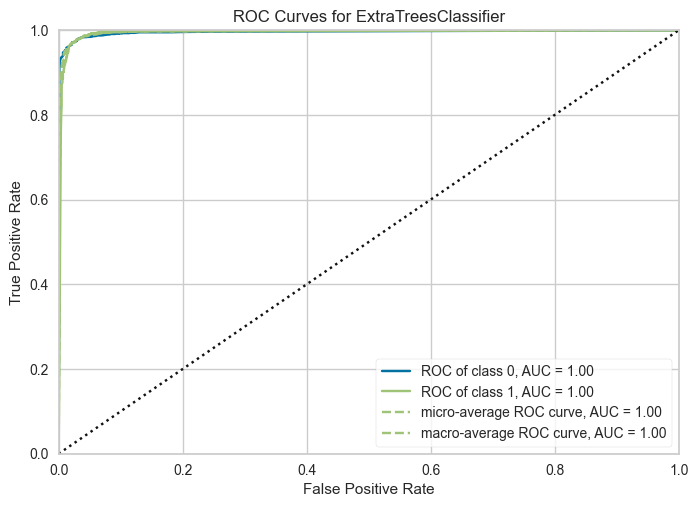

In [7]:
# Plot a Model
# AUC Plot
plot_model(Gradient_Boost_Classifier, plot = 'auc')

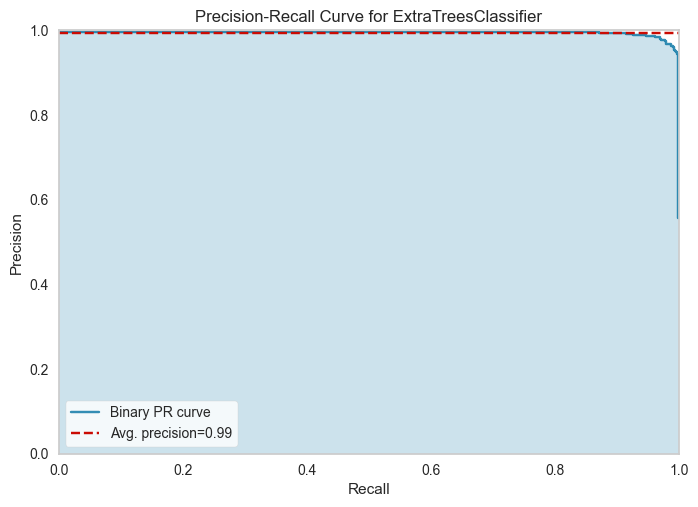

In [8]:
# Precision-Recall Curve
plot_model(Gradient_Boost_Classifier, plot = 'pr')

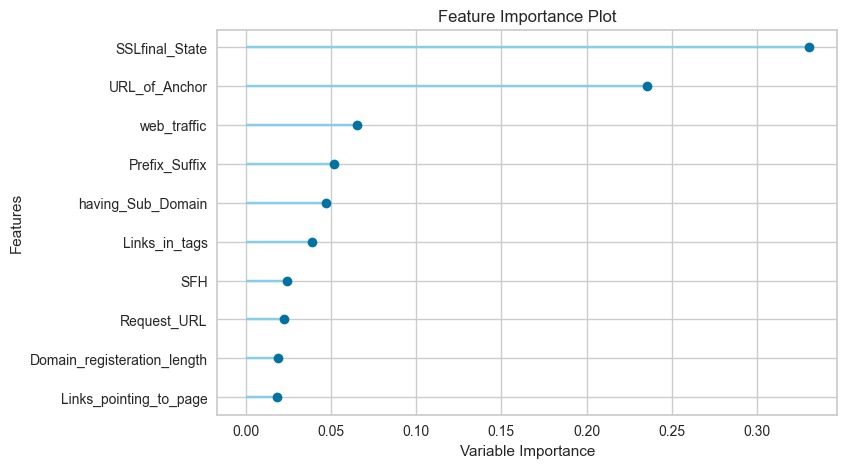

In [9]:
# Feature Importance Plot
plot_model(Gradient_Boost_Classifier, plot='feature')

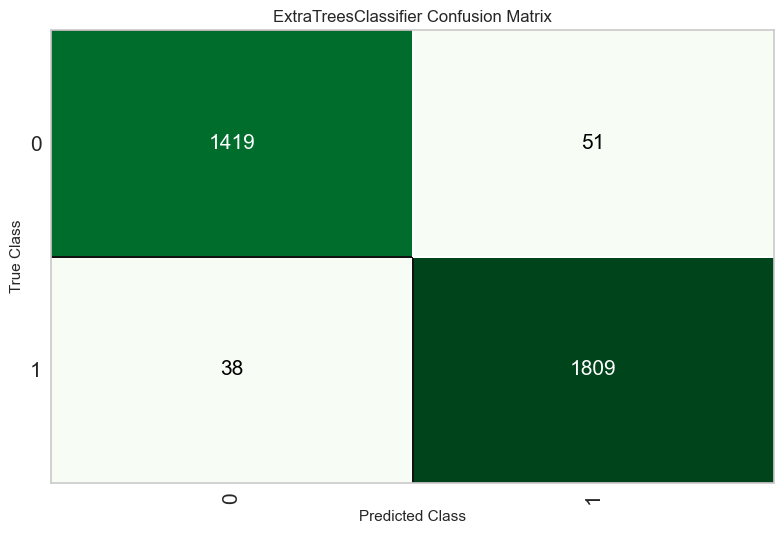

In [10]:
# Confusion Matrix
plot_model(Gradient_Boost_Classifier, plot = 'confusion_matrix')

In [11]:
# evaluate_model(Gradient_Boost_Classifier)

In [12]:
# saving the final model
# save_model(Gradient_Boost_Classifier,'Gradient_Boost_Classifier')

# create an iterator object with write permission - model.pkl
with open('model_pkl.pkl', 'wb') as files:
    pickle.dump(Gradient_Boost_Classifier, files)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['having_IP_Address', 'URL_Length',
                                              'Shortining_Service',
                                              'having_At_Symbol',
                                              'double_slash_redirecting',
                                              'Prefix_Suffix',
                                              'having_Sub_Domain',
                                              'SSL...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_f

In [37]:
import os 

model_folder =  os.path.join('models')
os.makedirs(model_folder, exist_ok=True) 

models = ['et', 'rf', 'lightgbm', 'dt', 'gbc']

def train_model(models):
    for model in models:
        print(f"Model : {model}")
        classifier_model = create_model(model, fold = 25)
#         plot_model(classifier_model, plot = 'auc')
#         plot_model(classifier_model, plot = 'pr')
#         plot_model(classifier_model, plot='feature')
#         plot_model(classifier_model, plot = 'confusion_matrix')
#         save_model(classifier_model, os.path.join('models', model+'_model'))
        with open(os.path.join('models', model+'_model.pkl'), 'wb') as files:
            pickle.dump(classifier_model, files)
        print('_'*50)

train_model(models)

Model : et


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9613,0.9888,0.9613,0.9613,0.9613,0.9216,0.9216
1,0.9548,0.9882,0.9548,0.9549,0.9548,0.9084,0.9085
2,0.9613,0.9864,0.9613,0.9613,0.9613,0.9216,0.9216
3,0.9839,0.9951,0.9839,0.9839,0.9839,0.9673,0.9673
4,0.9677,0.9938,0.9677,0.9677,0.9677,0.9346,0.9346
5,0.9742,0.9914,0.9742,0.9742,0.9742,0.9477,0.9477
6,0.9871,0.9947,0.9871,0.9872,0.9871,0.9738,0.9739
7,0.9677,0.9778,0.9677,0.9677,0.9677,0.9346,0.9346
8,0.9806,0.9941,0.9806,0.9806,0.9806,0.9608,0.9608


__________________________________________________
Model : rf


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9548,0.9908,0.9548,0.9549,0.9548,0.9084,0.9085
1,0.9548,0.9895,0.9548,0.9553,0.9547,0.9082,0.9089
2,0.9677,0.9957,0.9677,0.9677,0.9677,0.9347,0.9347
3,0.9742,0.9979,0.9742,0.9748,0.9741,0.9474,0.9482
4,0.9677,0.9974,0.9677,0.9677,0.9677,0.9346,0.9346
5,0.9774,0.9981,0.9774,0.9774,0.9774,0.9542,0.9542
6,0.9903,0.9970,0.9903,0.9905,0.9903,0.9803,0.9805
7,0.9516,0.9877,0.9516,0.9517,0.9516,0.9017,0.9019
8,0.9742,0.9977,0.9742,0.9742,0.9742,0.9477,0.9477


__________________________________________________
Model : lightgbm


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9581,0.9968,0.9581,0.9581,0.9580,0.9150,0.9151
1,0.9548,0.9935,0.9548,0.9549,0.9548,0.9084,0.9085
2,0.9742,0.9946,0.9742,0.9742,0.9742,0.9477,0.9478
3,0.9742,0.9978,0.9742,0.9744,0.9741,0.9475,0.9478
4,0.9710,0.9968,0.9710,0.9710,0.9710,0.9412,0.9412
5,0.9806,0.9980,0.9806,0.9809,0.9806,0.9606,0.9610
6,0.9903,0.9996,0.9903,0.9903,0.9903,0.9804,0.9804
7,0.9581,0.9940,0.9581,0.9583,0.9581,0.9152,0.9154
8,0.9839,0.9981,0.9839,0.9839,0.9839,0.9673,0.9673


__________________________________________________
Model : dt


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9581,0.9790,0.9581,0.9583,0.9581,0.9153,0.9155
1,0.9516,0.9721,0.9516,0.9516,0.9516,0.9020,0.9020
2,0.9581,0.9686,0.9581,0.9581,0.9580,0.9150,0.9151
3,0.9613,0.9692,0.9613,0.9613,0.9613,0.9215,0.9215
4,0.9677,0.9818,0.9677,0.9677,0.9677,0.9346,0.9346
5,0.9645,0.9741,0.9645,0.9648,0.9646,0.9282,0.9284
6,0.9742,0.9762,0.9742,0.9742,0.9742,0.9477,0.9477
7,0.9355,0.9450,0.9355,0.9357,0.9355,0.8694,0.8695
8,0.9613,0.9748,0.9613,0.9613,0.9613,0.9215,0.9215


__________________________________________________
Model : gbc


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9452,0.9930,0.9452,0.9452,0.9451,0.8887,0.8889
1,0.9387,0.9869,0.9387,0.9387,0.9387,0.8758,0.8759
2,0.9516,0.9921,0.9516,0.9523,0.9515,0.9016,0.9025
3,0.9516,0.9930,0.9516,0.9517,0.9516,0.9017,0.9019
4,0.9484,0.9914,0.9484,0.9488,0.9482,0.8949,0.8956
5,0.9774,0.9966,0.9774,0.9775,0.9774,0.9541,0.9543
6,0.9774,0.9977,0.9774,0.9775,0.9774,0.9541,0.9543
7,0.9226,0.9816,0.9226,0.9226,0.9226,0.8430,0.8430
8,0.9677,0.9931,0.9677,0.9678,0.9677,0.9345,0.9346


__________________________________________________


In [55]:
import glob
import joblib
import pickle
import numpy as np

df = pd.read_csv('phishing.csv')

def load_model(pkl_file_path):
    with open(pkl_file_path, 'rb') as file:
        model = pickle.load(file)
        # model = joblib.load(pkl_file_path)
    return model

def predict_with_model(model, input_data, class_names):
    # Make a prediction
    print(input_data, type(input_data))
    # predicted_output = model.predict([input_data])
    predicted_proba = model.predict_proba([input_data])[0]
    predicted_class_index = np.argmax(predicted_proba)
    predicted_class_name = class_names[predicted_class_index]
    predicted_class_probability = predicted_proba[predicted_class_index]

    return {
        "class_name": predicted_class_name,
        "probability": predicted_class_probability
    }

# Example usage
# models_ls = [md for md in glob.glob(os.path.join('models', '*'))]
for md in glob.glob(os.path.join('models', '*')):
    pkl_file_path = md # 'path_to_your_model.pkl'
    class_names = [-1, 1] # Update with your actual class names
    model = load_model(pkl_file_path)
    print(f"model : {model}")
    input_data = df.iloc[0, :-1] # .values # [your_input_features] # Update with your actual input data
    result = predict_with_model(model, input_data, class_names)
    print(result, ' || ',  df.iloc[0,-1])
    print('__'*30)


model : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=1295, splitter='best')
having_IP_Address             -1
URL_Length                     1
Shortining_Service             1
having_At_Symbol               1
double_slash_redirecting      -1
Prefix_Suffix                 -1
having_Sub_Domain             -1
SSLfinal_State                -1
Domain_registeration_length   -1
Favicon                        1
port                           1
HTTPS_token                   -1
Request_URL                    1
URL_of_Anchor                 -1
Links_in_tags                  1
SFH                           -1
Submitting_to_email           -1
Abnormal_URL                  -1
Redirect             

{'class_name': -1, 'probability': 1.0}  ||  -1
____________________________________________________________


In [ ]:
# load model
with open('models/rf_model.pkl', 'rb') as f:
    loaded_classifier = pickle.load(f)
print(loaded_classifier)

# predict
y_pred = loaded_classifier.predict([df.iloc[10, :-1]])
y_pred, df.iloc[10, -1]

In [54]:
loaded_classifier.predict_proba([df.iloc[10, :-1]])[0]

array([0.05, 0.95])

In [36]:
# print(len(['having_IP_Address', 'URL_Length', 'Shortining_Service', 'having_At_Symbol', 
#       'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 
#       'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port', 
#       'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 
#       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 
#       'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 
#       'Google_Index', 'Links_pointing_to_page', 'Statistical_report']) )